In [50]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt
from utils import constants as cnst
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from utils import u_grid, u_interpolate as u_int, u_darrays as uda

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/09/06/IR_wavelet_BT_20200906_*.nc'

In [4]:
data = xr.open_mfdataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [19]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(15,10))
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    ax.stock_img()
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree())
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.colorbar()
    plt.show()

In [20]:
tstep_old = data.isel(time=0).load() #-12

In [23]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667)
Coordinates:
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
    time     datetime64[ns] 2020-09-06
Data variables:
    power    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BT       (lat, lon) int16 1882 1771 1781 1985 1973 ... 2150 2190 2208 2220
Attributes:
    radii:              [ 2  2  3  4  6  8 11 16 21]
    scales_rounded:     [ 12  16  22  29  40  53  72  97 130]
    scales_original:    [ 12.          16.16680292  21.78045973  29.34336666 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [24]:
tir = tstep_old['BT']
tir.values = np.array(tir.values/100, dtype=float)
tir.values[tir.values>-60] = np.nan

In [28]:
msg_folder = cnst.TOPO_1MIN
topo = xr.open_dataarray(msg_folder)
topo = topo.sel(lon=slice(-19,-7), lat=slice(8,19))


In [31]:
topo

<xarray.DataArray 'h' (lat: 660, lon: 720)>
array([[  0,   0,   0, ..., 265, 276, 282],
       [  0,   0,   0, ..., 271, 277, 287],
       [  0,   0,   0, ..., 280, 281, 292],
       ...,
       [  0,   0,   0, ..., 337, 337, 333],
       [  0,   0,   0, ..., 337, 340, 344],
       [  0,   0,   0, ..., 344, 343, 344]], dtype=int16)
Coordinates:
  * lon      (lon) float32 -18.991669 -18.975006 ... -7.025009 -7.0083313
  * lat      (lat) float32 8.008331 8.025002 8.041664 ... 18.974998 18.991661
Attributes:
    long_name:  Altitude
    units:      m

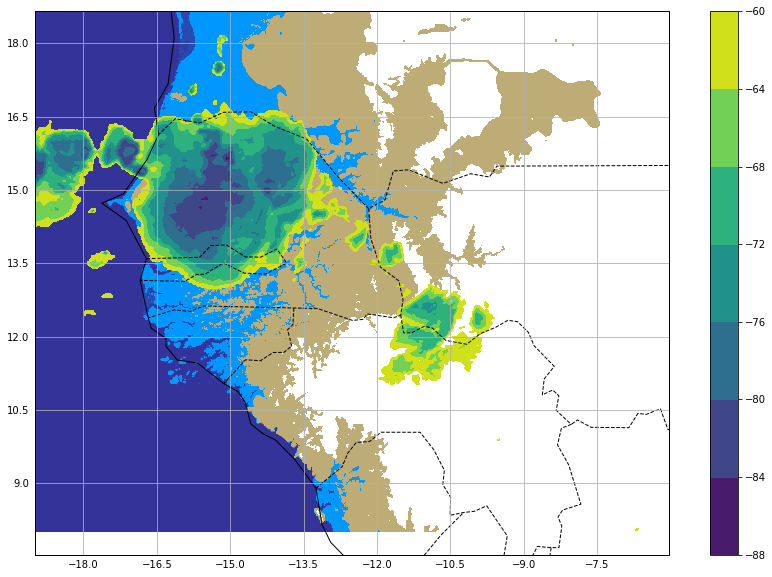

In [47]:
f=plt.figure(figsize=(15,10))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
ax.contourf(topo['lon'], topo['lat'],topo, transform=ccrs.PlateCarree(), cmap='terrain', levels=[0,1,2,3,4,5,10,50,200])
plt.contourf(tstep_old['lon'], tstep_old['lat'],tir, transform=ccrs.PlateCarree())
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()
plt.show()


URLError: <urlopen error [Errno -2] Name or service not known>

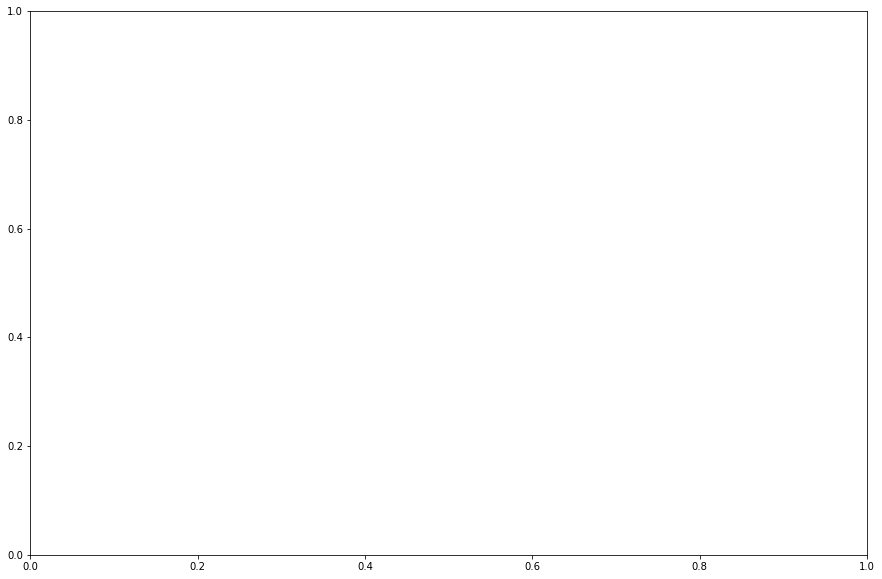

In [60]:


import salem
import matplotlib.pyplot as plt

# get the map from a predefined grid
# grid = salem.mercator_grid(transverse=False, center_ll=(16., 0.),
#                            extent=(8e6, 9e6))
f=plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
grid = u_grid.make(np.linspace(-20,-7), np.linspace(8,19), 3)
smap = salem.Map(grid)

# Add the background (other resolutions include: 'mr', 'hr')
smap.set_rgb(natural_earth='hr')

# done!
smap.visualize()
plt.show()

